In [3]:
# 1- Leitura do arquivo
# 2- Vizualização dos dados
# 3- Calculando mês menos chuvoso
# 4- Calculando a média de temperatura mínima  de um determinado mês
# 5- Vizualizando o gráfico em barras

VERSÃO DO PYTHON UTILIZADA FOI A 3.10.11

1- Leitura do arquivo

In [4]:
# Imports
# Importando o pandaas para visualização de dados e o datatime para converter os valores de data para datetime
import pandas as pd
import matplotlib as mat
import matplotlib.pyplot as plt
import calendar
import datetime as dt

In [5]:
# Carregando o arquivo em pandas
df = pd.read_csv(r'Anexo_Arquivo_Dados_Projeto_Logica_e_programacao_de_computadores.csv')


In [6]:
# Imprimindo os valores iniciais e finais do dataframe
df

,data,precip,maxima,minima,horas_insol,temp_media,um_relativa,vel_vento
0,01/01/1961,0.0,33.8,22.2,11.7,27.08,67.00,2.333333
1,02/01/1961,0.0,34.7,22.5,9.5,28.06,62.50,1.333333
2,03/01/1961,0.2,27.7,23.1,2.3,24.32,74.25,2.000000
3,04/01/1961,2.4,29.4,20.6,8.7,23.56,57.50,2.333333
4,05/01/1961,0.0,32.5,18.8,10.1,25.22,63.50,3.666667
...,...,...,...,...,...,...,...,...
18558,06/07/2016,21.8,23.3,13.6,1.7,14.96,73.25,4.801440
18559,07/07/2016,0.0,18.4,9.8,7.6,12.96,73.25,2.915160
18560,08/07/2016,0.0,19.4,7.6,6.3,12.64,76.25,1.200360
18561,09/07/2016,0.0,14.2,11.7,0.0,12.66,94.25,1.371840


In [7]:
# Checando valores nulos
df.isnull().sum()

data           0
precip         0
maxima         0
minima         0
horas_insol    0
temp_media     0
um_relativa    0
vel_vento      0
dtype: int64

In [8]:
# Checando o tipo de valores
df.dtypes

data            object
precip         float64
maxima         float64
minima         float64
horas_insol    float64
temp_media     float64
um_relativa    float64
vel_vento      float64
dtype: object

In [9]:
# Convertendo a coluna de datas do dataframe para o tipo DateTime para facilitar a manipulação
df['data'] = pd.to_datetime(df['data'])

C:\Users\Sergio\AppData\Local\Temp\ipykernel_12264\4280479766.py:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['data'] = pd.to_datetime(df['data'])


In [10]:
df

,data,precip,maxima,minima,horas_insol,temp_media,um_relativa,vel_vento
0,1961-01-01,0.0,33.8,22.2,11.7,27.08,67.00,2.333333
1,1961-02-01,0.0,34.7,22.5,9.5,28.06,62.50,1.333333
2,1961-03-01,0.2,27.7,23.1,2.3,24.32,74.25,2.000000
3,1961-04-01,2.4,29.4,20.6,8.7,23.56,57.50,2.333333
4,1961-05-01,0.0,32.5,18.8,10.1,25.22,63.50,3.666667
...,...,...,...,...,...,...,...,...
18558,2016-06-07,21.8,23.3,13.6,1.7,14.96,73.25,4.801440
18559,2016-07-07,0.0,18.4,9.8,7.6,12.96,73.25,2.915160
18560,2016-08-07,0.0,19.4,7.6,6.3,12.64,76.25,1.200360
18561,2016-09-07,0.0,14.2,11.7,0.0,12.66,94.25,1.371840


 2- Vizualização dos dados

In [11]:
def visualizar_dados(dataframe):
    df['data'] = pd.to_datetime(dataframe['data'])

    while True:
        try:
            # Solicitar entrada do usuário para o período no formato "dia-mês-ano"
            data_inicial = input("Informe o período inicial (dia-mês-ano): ")
            data_final = input("Informe o período final (dia-mês-ano): ")

            # Converter as entradas para objetos de data
            data_inicial = pd.to_datetime(data_inicial, format="%d/%m/%y")  # Ajuste aqui
            data_final = pd.to_datetime(data_final, format="%d/%m/%y")  # Ajuste aqui

            # Validar se a data final é posterior à data inicial
            if data_final < data_inicial:
                print("Erro: A data final deve ser posterior à data inicial.")
                continue  # Volta para o início do loop se as datas forem inválidas

            while True:
                try:
                    tipo_dados = int(input("Selecione o tipo de dados a visualizar:\n"
                                        "1 - Todos os dados\n"
                                        "2 - Precipitação\n"
                                        "3 - Temperatura\n"
                                        "4 - Umidade e Vento\n"))
                    # Validando a entrada do usuário
                    if tipo_dados not in [1, 2, 3, 4]:
                        raise ValueError("Opção inválida")
                    
                    break  # Sai do loop interno se a entrada do tipo de dados for válida
                
                except ValueError:
                    print("Erro: Por favor, escolha uma opção válida (1 a 4).")
                    continue  # Volta para o início do loop interno se a entrada for inválida

            # Filtrar os dados com base no período informado
            dados_periodo = dataframe[dataframe['data'].between(data_inicial, data_final)]

            # Filtrar os dados com base no tipo selecionado
            if tipo_dados == 2:
                dados_periodo = dados_periodo[['data', 'precip']]
            elif tipo_dados == 3:
                dados_periodo = dados_periodo[['data', 'temp_media']]
            elif tipo_dados == 4:
                dados_periodo = dados_periodo[['data', 'um_relativa', 'vel_vento']]

            # Exibir os dados
            print(dados_periodo)

            # Se chegou até aqui, todos os passos foram concluídos com sucesso
            print("Período selecionado corretamente.")
            break  # Sai do loop principal após um período ser selecionado corretamente

        except ValueError as e:
            print(f"Erro: coloque um valor válido ex: 01/02/61 (01/02/1961)")
            print(e)
            continue  # Volta para o loop


In [12]:
visualizar_dados(df)

Erro: coloque um valor válido ex: 01/02/61 (01/02/1961)
time data '20052000' does not match format '%d/%m/%y' (match)
Erro: coloque um valor válido ex: 01/02/61 (01/02/1961)
time data '200203' does not match format '%d/%m/%y' (match)
Erro: coloque um valor válido ex: 01/02/61 (01/02/1961)
time data '010261' does not match format '%d/%m/%y' (match)
            data  precip  maxima  minima  horas_insol  temp_media  \
13269 2002-06-01    14.4    31.2    21.0          8.1       25.88   
13270 2002-07-01     0.0    29.4    21.0         11.0       24.90   
13271 2002-08-01     0.0    30.6    20.6          9.0       25.00   
13272 2002-09-01     0.0    29.9    21.0          7.5       24.90   
13273 2002-10-01     0.0    29.6    21.9          7.0       25.30   
...          ...     ...     ...     ...          ...         ...   
15784 2008-01-12     7.5    28.0    20.6          4.2       23.04   
15785 2008-02-12    17.8    25.8    15.9          3.5       19.34   
15786 2008-03-12    28.2    2

3- Calculando mês menos chuvoso

Nessa parte do codigo eu fiz 2 funções uma que descobre o mes menos chuvoso e sua preciptação e em seguida criei outra pra filtra apenas os que tem preciptação maior que 0. Como eu nao sei qual deveria considerar eu deixei as 2 

In [13]:
def mes_menos_chuvoso(dataframe):
    # Obter o índice correspondente à menor precipitação
    idx_menor_precipitacao = dataframe['precip'].idxmin()

    # Obter a data e precipitação correspondentes ao índice encontrado
    data_mes_menos_chuvoso = dataframe.loc[idx_menor_precipitacao, 'data']
    precip_menor_chuvoso = dataframe.loc[idx_menor_precipitacao, 'precip']
    mes_menos_chuvoso = data_mes_menos_chuvoso.month

    # Exibir na tela
    print(f"Mês menos chuvoso foi: {mes_menos_chuvoso}, para a data de {data_mes_menos_chuvoso}, teve a menor Precipitação: {precip_menor_chuvoso}")

# Chamada da função
mes_menos_chuvoso(df)


Mês menos chuvoso foi: 1, para a data de 1961-01-01 00:00:00, teve a menor Precipitação: 0.0


In [14]:
# Criando uma função que chama os meses que tem a preciptação maior que 0
def mes_menos_chuvoso_filtrado(dataframe):
    # Filtrar os dados para considerar apenas precipitação maior que 0
    dados_com_precipitacao = dataframe[dataframe['precip'] > 0]

    # Verificar se há dados após o filtro
    if dados_com_precipitacao.empty:
        print("Não há dados de precipitação maiores que 0.")
        return

    # Encontrar o índice do mês/ano com menor precipitação
    idx_menor_precipitacao = dados_com_precipitacao['precip'].idxmin()

    # Obter o valor da data correspondente ao menor índice de precipitação
    data_mes_menos_chuvoso = dados_com_precipitacao.loc[idx_menor_precipitacao, 'data']
    mes_menos_chuvoso = data_mes_menos_chuvoso.month

    # Exibir na tela
    print(f"Mês menos chuvoso (com precipitação > 0) foi o mes {mes_menos_chuvoso}, para o perido de {data_mes_menos_chuvoso},e com Precipitação: {dados_com_precipitacao.loc[idx_menor_precipitacao, 'precip']}")

# Chamada da função
mes_menos_chuvoso_filtrado(df)


Mês menos chuvoso (com precipitação > 0) foi o mes 1, para o perido de 1961-01-25 00:00:00,e com Precipitação: 0.1


4 - Calculando a média de temperatura mínima  de um determinado mês

In [15]:
def media_temperatura_minima(dataframe, mes_escolhido):
    # Filtrar os dados para o mês escolhido
    dados_mes = dataframe[dataframe['data'].dt.month == mes_escolhido]

    # Calcular a média da temperatura mínima para o mês escolhido
    media_mes_escolhido = dados_mes['minima'].mean()

    # Calcular a média geral da temperatura mínima para todo o período
    media_geral = dataframe['minima'].mean()

    # Exibir na tela
    print(f"Média da temperatura mínima de {mes_escolhido}/{2006} a {mes_escolhido}/{2016}: {media_mes_escolhido}")
    print(f"Média geral da temperatura mínima para todo o período: {media_geral}")

# Chamada da função
mes_escolhido = int(input("Informe o número do mês desejado (1 a 12): "))
if mes_escolhido not in range(1,13):
    print('Escolha um numero de 1 a 12, que represente cada mês do ano') 
    
media_temperatura_minima(df, mes_escolhido)


Média da temperatura mínima de 5/2006 a 5/2016: 13.881663516068052
Média geral da temperatura mínima para todo o período: 15.65696816247374


5- Vizualizando o gráfico em barras

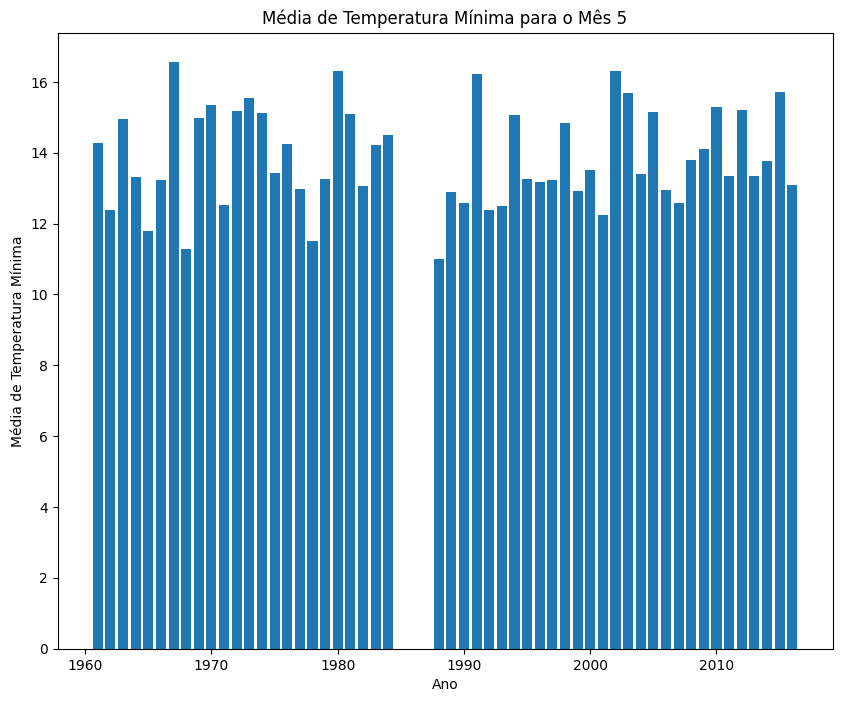

In [16]:
def grafico_barras(dataframe, mes_escolhido):
    # Filtrando os dados para o mês escolhido
    dados_mes = dataframe[dataframe['data'].dt.month == mes_escolhido]

    # Calculando a média da temperatura mínima para cada ano
    medias_por_ano = dados_mes.groupby(dataframe['data'].dt.year)['minima'].mean()

    # Criar o gráfico de barras
    plt.figure(figsize = (10, 8))                                       
    plt.bar(medias_por_ano.index, medias_por_ano)
    plt.xlabel('Ano')
    plt.ylabel('Média de Temperatura Mínima')
    plt.title(f'Média de Temperatura Mínima para o Mês {mes_escolhido}')
    plt.show()

# Chamada da função

grafico_barras(df, mes_escolhido)